<h1 id="background">Customer Segmentation</h1>
<p>
A motivation developed for real scenarios identifying key customers for marketing, increasing probability of product purchases.  This notebook is a significantly modifed version, new content on EDA, of the original notebook from IBM's course on Machine Learning.<br><br>
</p>

<h3>Library Dependencies</h3>
Import respective python libraries needed

In [6]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

%matplotlib inline

<h3>Exploratory Data Analysis</h3>
EDA (Exploratory Data Analysis) of basic statistics of the data, descriptions, clustering of various attributes of customers for improving target marketing

<h5>Import Data Source</h5>

In [1]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h5>Data Preparation</h5>
Drop "Address", categorical data which doesn't influence the segmentation as there's no location data present

In [2]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [24]:
# In the dataset replace all "?" with NaN
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [25]:
missing_data = df.isnull()
missing_data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [26]:
# Print all columns, and determine those columns with a True where no data exists and must be either replaced or dropped
for column in missing_data.columns.values.tolist():
        print("column #:", column, "", df.loc[0, column])
        print (missing_data[column].value_counts())
        print("") 

column #: Customer Id  1
False    850
Name: Customer Id, dtype: int64

column #: Age  41
False    850
Name: Age, dtype: int64

column #: Edu  2
False    850
Name: Edu, dtype: int64

column #: Years Employed  6
False    850
Name: Years Employed, dtype: int64

column #: Income  19
False    850
Name: Income, dtype: int64

column #: Card Debt  0.124
False    850
Name: Card Debt, dtype: int64

column #: Other Debt  1.073
False    850
Name: Other Debt, dtype: int64

column #: Defaulted  0.0
False    700
True     150
Name: Defaulted, dtype: int64

column #: DebtIncomeRatio  6.3
False    850
Name: DebtIncomeRatio, dtype: int64



<h5>Normalization</h5>
Standardize the dataset to facilitate interpretation for feature engineering, such as for different magnitudes

In [7]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Age bins')

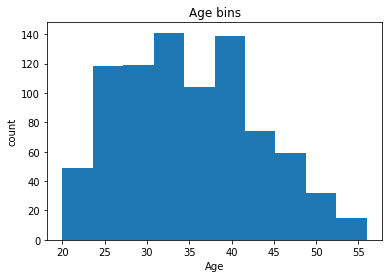

In [9]:
# Plot histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Age"])

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Age bins")

Text(0.5, 1.0, 'Income bins')

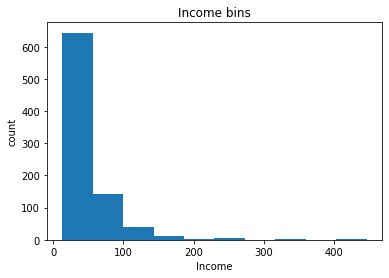

In [10]:
plt.pyplot.hist(df["Income"])

# set x/y labels and plot title
plt.pyplot.xlabel("Income")
plt.pyplot.ylabel("count")
plt.pyplot.title("Income bins")

Text(0.5, 1.0, 'DebtIncomeRatio bins')

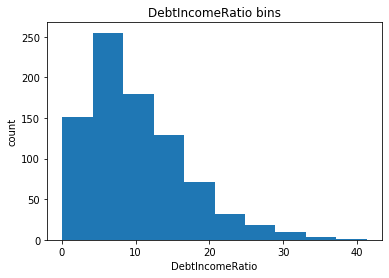

In [11]:
plt.pyplot.hist(df["DebtIncomeRatio"])

# set x/y labels and plot title
plt.pyplot.xlabel("DebtIncomeRatio")
plt.pyplot.ylabel("count")
plt.pyplot.title("DebtIncomeRatio bins")

,DebtIncomeRatio,Income
DebtIncomeRatio,1.000000,-0.035585
Income,-0.035585,1.000000


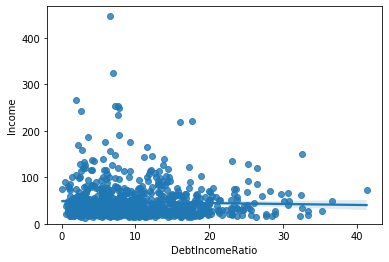

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x="DebtIncomeRatio", y="Income", data=df)
plt.ylim(0,)
df[["DebtIncomeRatio", "Income"]].corr()

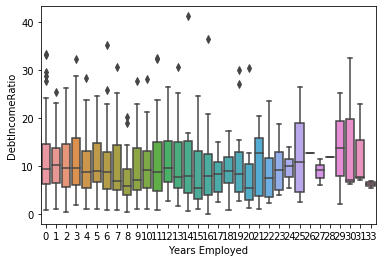

In [16]:
# Years employed seems to be a decent predictor of higher DebtIncomeRatio
sns.boxplot(x="Years Employed", y="DebtIncomeRatio", data=df)

In [18]:
#Descriptive statistics
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [19]:
df.shape

(850, 9)

In [20]:
df.corr()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,1.000000,-0.004447,-0.031113,-0.035146,-0.017675,0.001015,-0.009061,-0.004244,0.014039
Age,-0.004447,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,-0.031113,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,-0.035146,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,-0.017675,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.001015,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,-0.009061,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.004244,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.014039,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


In [21]:
# For Pearson correlation
from scipy import stats

In [27]:
pearson_coef, p_value = stats.pearsonr(df['Income'], df['DebtIncomeRatio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.03558487784635046  with a P-value of P =  0.30007617985038854


In [28]:
pearson_coef, p_value = stats.pearsonr(df['Card Debt'], df['DebtIncomeRatio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.5149705344215747  with a P-value of P =  9.58266508357462e-59


In [29]:
pearson_coef, p_value = stats.pearsonr(df['Other Debt'], df['DebtIncomeRatio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.5725450410398931  with a P-value of P =  3.435477490497817e-75


In [30]:
pearson_coef, p_value = stats.pearsonr(df['Income'], df['Card Debt'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.5515103559229426  with a P-value of P =  8.277684860188322e-69


In [31]:
pearson_coef, p_value = stats.pearsonr(df['Income'], df['Other Debt'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6033556825995295  with a P-value of P =  2.0461813919536774e-85


In [32]:
pearson_coef, p_value = stats.pearsonr(df['Years Employed'], df['DebtIncomeRatio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.03362502271359927  with a P-value of P =  0.3274991005654157


<h3>Modeling</h3>
Developing K-means model

In [33]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [34]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [35]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


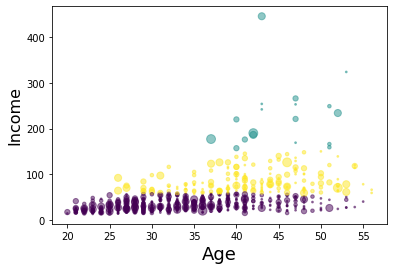

In [36]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

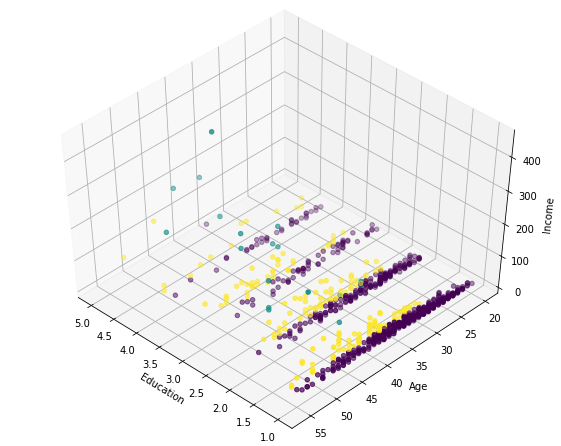

In [37]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

<h3>Conclusion</h3>
K-means partitions the customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME